------
# Stern Gerlach (simuliert...)

An dieser Stelle wollen wir das Stern-Gerlach Experiment simulieren. Denn Qubits und Elektronenspins (magnetische Momente) sind mathematisch tatsächlich das gleiche Quantensystem!

Also: 1 Qubit $\equiv$ 1 Elektronenspin



In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
#Register erstellen und Schaltkreis generieren
reg = QuantumRegister(1)
qc = QuantumCircuit(reg)

In [3]:
#Anfangszustand (ist natürlich ein Vektor!)
initial_state = [0,1]

#Anfangszustand in das Qubit schreiben
qc.initialize(initial_state, 0)

#Schaltkreis darstellen
qc.draw()

┌─────────────────┐
q0: ┤ Initialize(0,1) ├
    └─────────────────┘

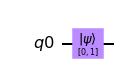

In [4]:
qc.draw('mpl')

In [5]:
#Simulator/Backend auswählen (hier können wir später echte Quantencomputer auswählen!)
sim = Aer.get_backend('statevector_simulator')

In [6]:
#Job erstellen
job = sim.run(qc)

#Ergebnisse abholen
result = job.result()

In [7]:
#in den Quantenzustand reinschauen, keine Messung!
#ist in der Realität (auf echten Quantencomputern) nicht möglich, hier in der Simulation schon ^^
outputstate = result.get_statevector(qc, decimals=1)
print(outputstate)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [8]:
#Messung einbauen
qc.measure_all()

qc.draw()

┌─────────────────┐ ░ ┌─┐
    q0: ┤ Initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0

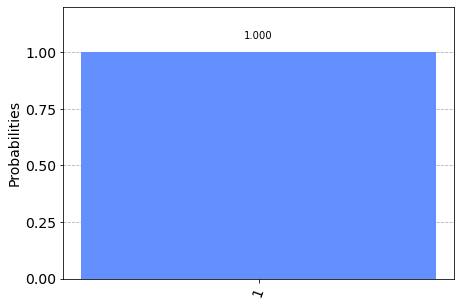

In [9]:
#neuer Simulator, 
qasm_sim = Aer.get_backend('qasm_simulator')

qasm_job = qasm_sim.run(qc, shots=1024)
result = qasm_job.result()

counts = result.get_counts()

### Qubits werden immer mit 0 initialisiert!

plot_histogram(counts)

In [10]:
from qiskit import quantum_info

#Stern-Gerlach-Experiment
def stern_gerlach():
    '''
    Run one interation of the Stern-Gerlach experiment
    
    Args:
        None
        
    Returns:
        counts (dict)
    '''
    
    #Schaltkreis erzeugen
    reg_sg = QuantumRegister(1)
    qc_sg = QuantumCircuit(reg_sg)
    
    #zufälliger Anfangszustand
    initial_state = quantum_info.random_statevector(dims=2)
    
    #print(initial_state)
    
    #Anfangszustand in das Qubit schreiben
    qc_sg.initialize(initial_state, 0)
    
    #Messung einbauen
    qc_sg.measure_all()
    
    #simulieren
    qasm_sim = Aer.get_backend('qasm_simulator')

    qasm_job = qasm_sim.run(qc_sg, shots=1)
    result = qasm_job.result()

    counts = result.get_counts().int_outcomes()
    
    return counts

In [11]:
#Stern-Gerlach-Experiment durchführen

#100 verschiedene zufällig ausgerichtete "Silberatome" frisch aus dem Ofen messen
N = 100

#Messergebnisse sammeln wir hier
counts = {}

#dies ist eine Schleife, die Zeilen in diesem Block werden N=100-mal ausgeführt
for i in range(N):
    
    measurement = stern_gerlach()

    for res in measurement:
        try:
            counts[res] = counts[res] + 1
            #oder kompakter: counts[res] +=1
            
        #Falls wir dieses Ergebnis zum ersten Mal messen, müssen wir erst einen neuen Eintrag erzeugen    
        except KeyError:
            counts[res] = 1
            
#Ende der Schleife

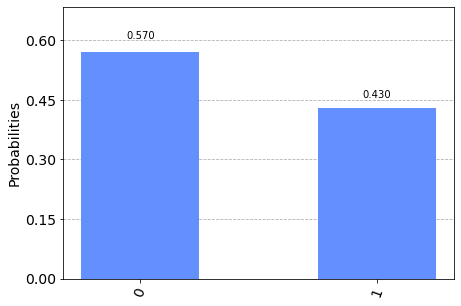

In [12]:
plot_histogram(counts)

In [13]:
counts

{1: 43, 0: 57}

In [14]:
#mit IBMQ verbinden
provider = IBMQ.load_account()

In [17]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_quito')

mapped_circuit = transpile(qc, backend)
qobj = assemble(mapped_circuit, backend=backend, shots=1024)

# execute the circuit
job = backend.run(qobj)

C:\Users\Alex\AppData\Local\Temp\ipykernel_64460\885248250.py:8: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


In [18]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

In [19]:
result = job.result()
counts = result.get_counts()

print(counts)

{'0': 80, '1': 944}


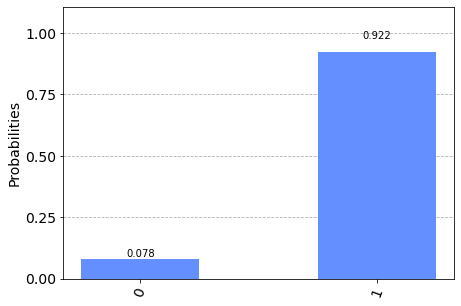

In [20]:
plot_histogram(counts)